<a href="https://colab.research.google.com/github/LeeJaeEun0/st1221/blob/main/221221_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DecisionTreeClassifier
## 와인분류
### 데이터 -> 모델링 -> 분류/회귀 => 기존의 모델들과 정확도 비교
### plot_tree로 시각화

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# https://www.kaggle.com/datasets/akhil0007/wine-data
# https://raw.githubusercontent.com/bigdata-young/https://github.com/bigdata-young/ai_26th/main/data/wine.csv'
url = "https://raw.githubusercontent.com/bigdata-young/ai_26th/main/data/wine.csv"
df = pd.read_csv(url)
df

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
df.info() # 결측치 x, object x
# 0)  클래스
# 1)  알코올
# 2)  사과산
# 3)  회분
# 4)  회분의 알칼리도
# 5)  마그네슘
# 6)  총 페놀
# 7)  플라바노이드
# 8)  비플라바노이드 페놀
# 9)  프로안토시아닌
# 10) 색도
# 11) 색조
# 12) 희석 와인의 OD280/OD315 13
# 13) 프롤린

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Ash_Alcanity          178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_Phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_Phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_Intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280                 178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
pd.options.display.float_format="{:,.4f}".format 
df.describe()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000
mean,1.9382,13.0006,2.3363,2.3665,19.4949,99.7416,2.2951,2.0293,0.3619,1.5909,5.0581,0.9574,2.6117,746.8933
std,0.7750,0.8118,1.1171,0.2743,3.3396,14.2825,0.6259,0.9989,0.1245,0.5724,2.3183,0.2286,0.7100,314.9075
min,1.0000,11.0300,0.7400,1.3600,10.6000,70.0000,0.9800,0.3400,0.1300,0.4100,1.2800,0.4800,1.2700,278.0000
25%,1.0000,12.3625,1.6025,2.2100,17.2000,88.0000,1.7425,1.2050,0.2700,1.2500,3.2200,0.7825,1.9375,500.5000
50%,2.0000,13.0500,1.8650,2.3600,19.5000,98.0000,2.3550,2.1350,0.3400,1.5550,4.6900,0.9650,2.7800,673.5000
75%,3.0000,13.6775,3.0825,2.5575,21.5000,107.0000,2.8000,2.8750,0.4375,1.9500,6.2000,1.1200,3.1700,985.0000
max,3.0000,14.8300,5.8000,3.2300,30.0000,162.0000,3.8800,5.0800,0.6600,3.5800,13.0000,1.7100,4.0000,"1,680.0000"


In [ ]:
df['Class'].value_counts() # 각 클래스별 개수

2    71
1    59
3    48
Name: Class, dtype: int64

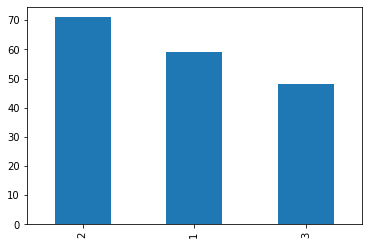

In [ ]:
df['Class'].value_counts().plot(kind='bar')

In [ ]:
df['Class'].value_counts() / len(df['Class']) # 전체 중에 각 클래스별 비율

2    0.398876
1    0.331461
3    0.269663
Name: Class, dtype: float64

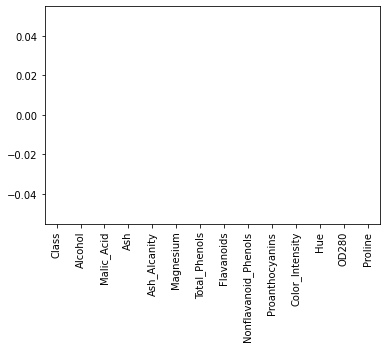

In [ ]:
df.isna().mean().plot(kind='bar') # 결측치 확인

In [ ]:
df.columns

Index(['Class', 'Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

## 훈련셋, 시험셋

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2, random_state=16
    )

## 모델링 & 평가

In [ ]:
from sklearn.tree import DecisionTreeClassifier # 분류

In [ ]:
model = DecisionTreeClassifier(random_state=21)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=21)

In [ ]:
pred = model.predict(X_test)
pred

array([3, 3, 1, 1, 3, 2, 1, 3, 3, 3, 1, 3, 1, 1, 2, 1, 2, 2, 2, 2, 1, 3,
       1, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2])

In [ ]:
model.predict_proba(X_test)

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_test, pred) # knn으로 처리하면 0.916666으로 knn에 더 적합한 모델

0.8611111111111112

## 하이퍼패러미터 튜닝

In [ ]:
def test_depth(depth):
  # max_depth : 트리의 깊이 제한
  model = DecisionTreeClassifier(random_state=100, max_depth=5)
  model.fit(X_train, y_train) # 훈련 데이터 -> 모델 학습
  # 훈련 데이터로 모델을 통해서 예측
  train_pred = model.predict(X_train) # 학습을 시킨 값으로 다시 예측
  # 시험 데이터로 모델을 통해서 예측
  test_pred = model.predict(X_test) # 새로운 값으로 신규 예측
  print(f"depth: {depth}")
  print(f"Train Score : {accuracy_score(y_train, train_pred)}") # 기출문제 풀기
  print(f"Test Score : {accuracy_score(y_test, test_pred)}") # 새로운 문제 풀기

In [ ]:
for i in range(1,20):
  test_depth(i)

depth: 1
Train Score : 1.0
Test Score : 0.8055555555555556
depth: 2
Train Score : 1.0
Test Score : 0.8055555555555556
depth: 3
Train Score : 1.0
Test Score : 0.8055555555555556
depth: 4
Train Score : 1.0
Test Score : 0.8055555555555556
depth: 5
Train Score : 1.0
Test Score : 0.8055555555555556
depth: 6
Train Score : 1.0
Test Score : 0.8055555555555556
depth: 7
Train Score : 1.0
Test Score : 0.8055555555555556
depth: 8
Train Score : 1.0
Test Score : 0.8055555555555556
depth: 9
Train Score : 1.0
Test Score : 0.8055555555555556
depth: 10
Train Score : 1.0
Test Score : 0.8055555555555556
depth: 11
Train Score : 1.0
Test Score : 0.8055555555555556
depth: 12
Train Score : 1.0
Test Score : 0.8055555555555556
depth: 13
Train Score : 1.0
Test Score : 0.8055555555555556
depth: 14
Train Score : 1.0
Test Score : 0.8055555555555556
depth: 15
Train Score : 1.0
Test Score : 0.8055555555555556
depth: 16
Train Score : 1.0
Test Score : 0.8055555555555556
depth: 17
Train Score : 1.0
Test Score : 0.805555

## 트리그래프 시각화

In [ ]:
from sklearn.tree import plot_tree

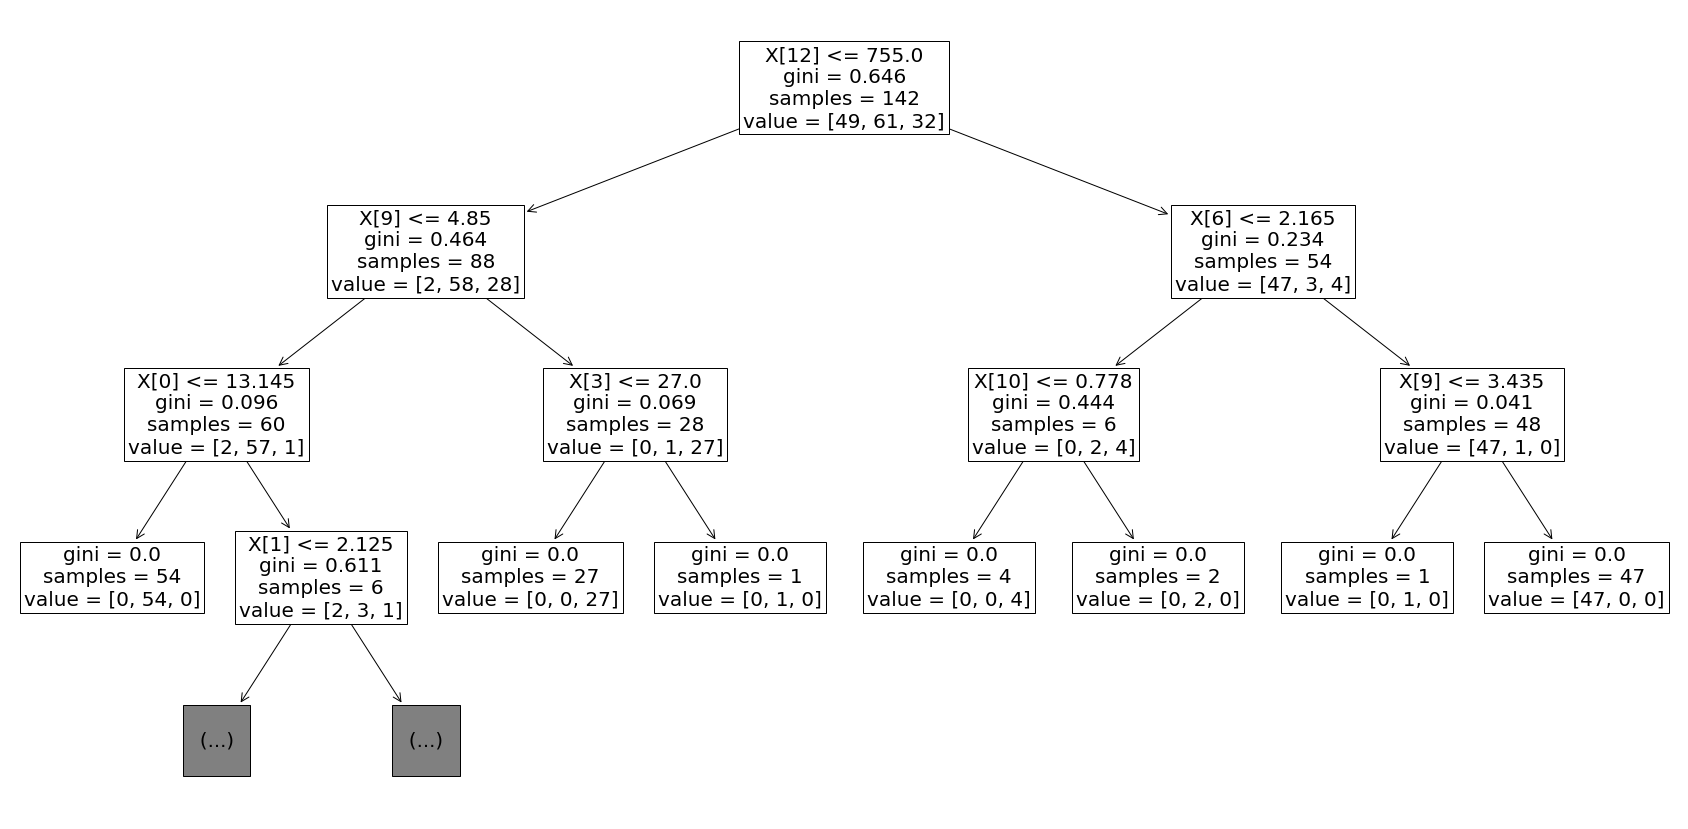

In [ ]:
plt.figure(figsize=(30, 15)) # plt 객체의 크기 결정
# 트리 구조를 보고 싶은 모델을 넣고, 최대 깊이, 폰트 사이즈, 
plot_tree(model, max_depth=3, fontsize=20) # 변수명 지정 X
plt.show()